In [3]:
library(lubridate)
library(dplyr)
# Reading the data from the CSV file
df <- read.csv(file="fenix_call_records.csv",header=TRUE,sep=",",stringsAsFactors = FALSE)
# looking at the dimensions of the dataframe
dim(df)

[1] 32028    14

In [4]:
# investigating the internal structure (summary) of the dataframe
str(df)

'data.frame':	32028 obs. of  14 variables:
 $ call_id              : int  2807990 2807991 2807992 2807993 2807994 2807995 2807996 2807997 2807998 2807999 ...
 $ destination_person_id: int  86394 86394 212967 114159 86394 77156 239005 114159 212967 114159 ...
 $ source_person_id     : int  269898 320367 129042 372282 366749 255608 354375 191685 245406 354282 ...
 $ account_age          : int  301 122 695 22 44 318 66 506 336 67 ...
 $ account_state        : chr  "In Repayment" "In Repayment" "In Repayment" "In Repayment" ...
 $ occupation           : chr  "Farmer" "Other" "Mechanic / Technician" "Farmer" ...
 $ language             : chr  "Luganda" "Luganda" "Luganda" "Lango" ...
 $ call_direction       : chr  "Incoming" "Incoming" "Incoming" "Incoming" ...
 $ call_duration        : num  0.78 1.93 4.9 3.77 2.62 2.83 1.1 0.75 4.27 0.55 ...
 $ call_outcome         : chr  "Call Resolved" "Call Resolved" "Call Resolved" "Call Resolved" ...
 $ call_start_date      : chr  "2017-10-21 04:02:09

In [5]:
## converting some columns from characters to factors
df[, c("account_state","occupation","language","call_direction","call_outcome",
       "call_topics", "call_topic_group")] <- lapply(df[, c("account_state","occupation","language","call_direction",
                                                            "call_outcome","call_topics", "call_topic_group")], factor)

In [6]:
## converting start_date and end_date into to POSIXlt date and time
df$call_start_date <- as.POSIXlt(df$call_start_date)
df$call_end_date <- as.POSIXlt(df$call_end_date)

In [7]:
# viewing the new structure of the dataFrame to check new datatypes
str(df)

'data.frame':	32028 obs. of  14 variables:
 $ call_id              : int  2807990 2807991 2807992 2807993 2807994 2807995 2807996 2807997 2807998 2807999 ...
 $ destination_person_id: int  86394 86394 212967 114159 86394 77156 239005 114159 212967 114159 ...
 $ source_person_id     : int  269898 320367 129042 372282 366749 255608 354375 191685 245406 354282 ...
 $ account_age          : int  301 122 695 22 44 318 66 506 336 67 ...
 $ account_state        : Factor w/ 4 levels "Cancelled","Complete",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ occupation           : Factor w/ 37 levels "","Accountant",..: 13 26 20 13 11 20 26 31 13 14 ...
 $ language             : Factor w/ 30 levels "","Acholi","Alur",..: 14 14 14 12 14 14 12 2 14 3 ...
 $ call_direction       : Factor w/ 2 levels "Incoming","Outgoing": 1 1 1 1 1 1 1 1 1 1 ...
 $ call_duration        : num  0.78 1.93 4.9 3.77 2.62 2.83 1.1 0.75 4.27 0.55 ...
 $ call_outcome         : Factor w/ 12 levels "Call Resolved",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 

In [8]:
#creating a new column to split day of week and time of day
df$call_hour <- df$call_start_date$hour
df$call_day <- df$call_start_date$wday + 1
df$call_month <- df$call_start_date$mon + 1


In [9]:
#str(df)
# convert day of week into factor and month into factor
df[, c("call_day","call_month")] <- lapply(df[, c("call_day","call_month")], factor)
df$call_day <- factor(df$call_day, levels=c('1','2','3','4','5','6','7'),
  labels=c('Sun','Mon','Tue','Wed','Thur','Fri','Sat'))
df$call_month <- factor(df$call_month, levels=c(10,11), labels=c("Oct", "Nov"))

In [10]:
# When do we experience the most traffic
# we group incoming call traffic by hour
subset_df <- select(df, -(call_start_date:call_end_date), -(call_id:language), -(call_duration:call_topic_group))
summary1 <- group_by(subset_df, call_direction, call_hour)
summary1 <- summarize(summary1, no_of_calls=n())
summary1

call_direction call_hour no_of_calls
1  Incoming        4         819       
2  Incoming        5         794       
3  Incoming        6        1189       
4  Incoming        7        1165       
5  Incoming        8        1528       
6  Incoming        9        1462       
7  Incoming       10        1363       
8  Incoming       11        1810       
9  Incoming       12        2134       
10 Incoming       13        1854       
11 Incoming       14        1933       
12 Incoming       15        1749       
13 Incoming       16        2183       
14 Incoming       17        2110       
15 Incoming       18        1953       
16 Incoming       19         240       
17 Outgoing        4          15       
18 Outgoing        5          20       
19 Outgoing        6         486       
20 Outgoing        7         950       
21 Outgoing        8         951       
22 Outgoing        9         671       
23 Outgoing       10         483       
24 Outgoing       11         831       
25 Outgoing       12        1409       
26 Outgoing       13         878       
27 Outgoing       14         740       
28 Outgoing       15         119       
29 Outgoing       16          69       
30 Outgoing       17          60       
31 Outgoing       18          49       
32 Outgoing       19          11

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”

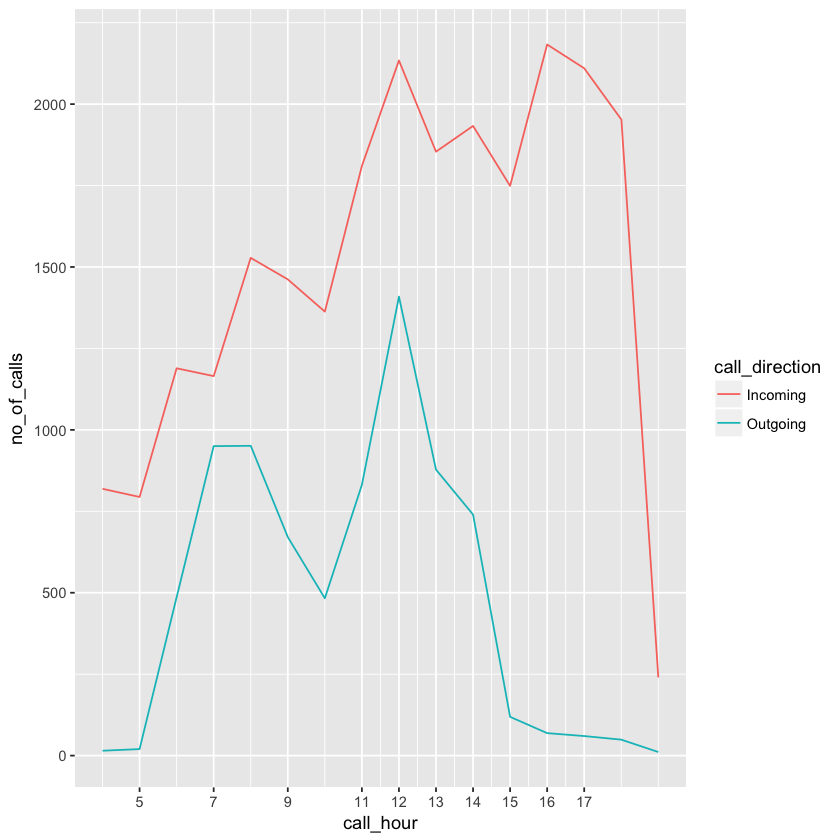

In [11]:
## loading ggplot for plotting graphs
library(ggplot2)
attach(summary1)
# generating a quick plot to visualize data
qplot(x=call_hour, y=no_of_calls, data=summary1, color=call_direction, geom="line") +
scale_x_continuous(breaks=c(5,7,9, 11,12,13,14,15,16,17,20,21,22,23))

## Question 1 Solution:
For the incoming calls, the most traffic is experienced at 16:00hrs. The number of incoming calls rises exponentially from 04:00hrs
and peaks at 12:00hrs, thereafter experiencing a decline between 12hrs and 13 hrs, before peaking again at 14hrs and later 
experiencing a sharp decline during the next 4 hours.
Whereas the pattern is similar for both the incoming and outgoing calls, on average the number of incoming calls is higher than the 
that of the outgoing calls.
    


## Solution to Question 3

In [12]:
## Retaining the call duration and call topic groups columns
subset_df2 <- select(df, -(call_outcome:call_end_date), -(call_id:call_direction), -(call_day:call_hour), - call_topic_group)
# obtaining the first 5 rows
head(subset_df2,5)

call_duration call_topics         call_month
1 0.78          Call Dropped        Oct       
2 1.93          Code Not Received   Oct       
3 4.90          RP Remote Technical Oct       
4 3.77          Code Not Received   Oct       
5 2.62          Code Not Received   Oct

In [13]:
# filter to retain 10 day call survey data and completion call survey topics
#df3 <- subset_df2[grep("^10 Day Call$|^Completions Call$", subset_df2$call_topics), ]
## obtaining subset of 10 day calls
df3 <- subset_df2[grep("^10 Day Call", subset_df2$call_topics), ]

# computing the mean of 10 day calls
mean(df3$call_duration)

[1] 4.207676

In [14]:
# Obtaining the subset for the Completions calls
df4 <- subset_df2[grep("^Completions Call", subset_df2$call_topics), ]

# mean for the Completions calls
mean(df4$call_duration)

[1] 3.437803

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


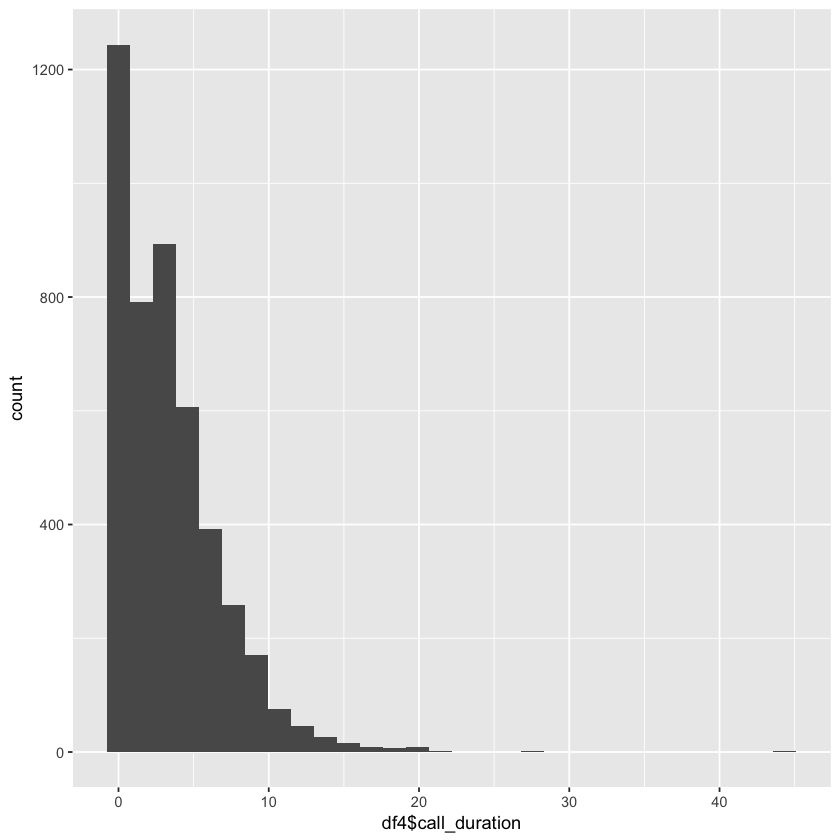

In [15]:
## visualizing the distribution of the mean call_duration for Completions call
qplot(df4$call_duration)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


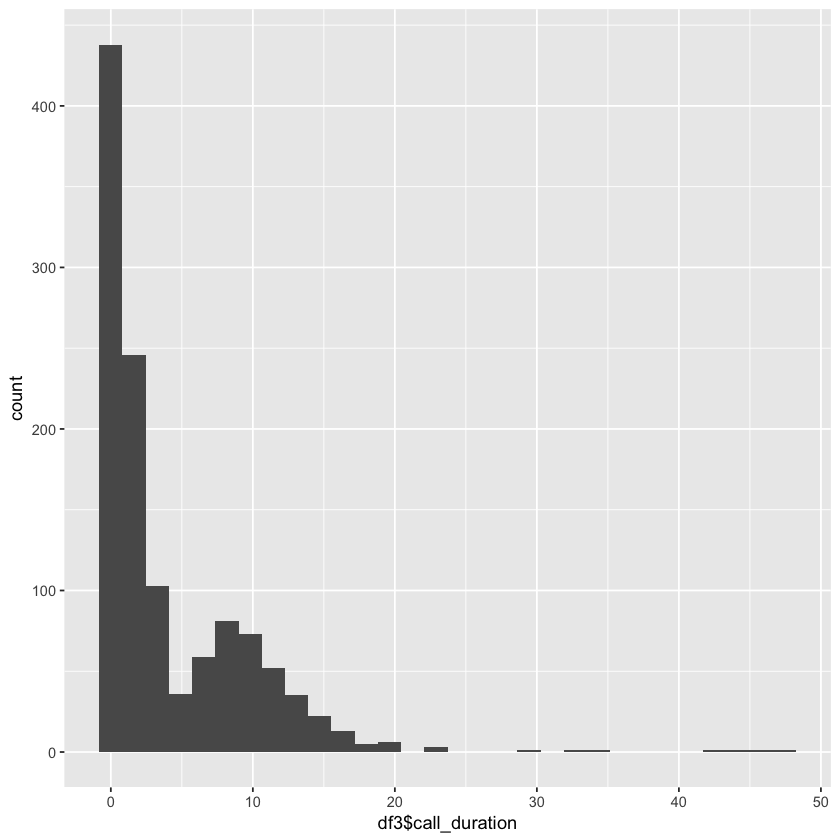

In [16]:
## Visualizing call durations for 10 day calls
qplot(df3$call_duration)

Both distributions are positively skewed. We will shall use the Wilcox test to determine in one group is different from the other

In [17]:
# using the wilcox test to test the two groups
wilcox.test(df3$call_duration, df4$call_duration, alternative="greater", paired=FALSE, conf.level=0.95)


	Wilcoxon rank sum test with continuity correction

data:  df3$call_duration and df4$call_duration
W = 2584900, p-value = 0.9713
alternative hypothesis: true location shift is greater than 0


From the data, we don't have suffecient evidence to conclude that 10 Day call surveys take longer for our call representatives
to complete than completion call surveys'

In [18]:
dfx <- subset_df2[grep("^10 Day Call$|^Completions Call$", subset_df2$call_topics), ]
gsub("^10 Day Call$","10 Day Call", subset_df2$call_topics)


[1] "Call Dropped"                                                                                                                        
    [2] "Code Not Received"                                                                                                                   
    [3] "RP Remote Technical"                                                                                                                 
    [4] "Code Not Received"                                                                                                                   
    [5] "Code Not Received"                                                                                                                   
    [6] "Code Entered Late, Code Not Received"                                                                                                
    [7] "General Question"                                                                                                                    
    [8] "Call transfer"                                                                                                                       
    [9] "Code Not Received"                                                                                                                   
   [10] "Call transfer"                                                                                                                       
   [11] "Code Not Received"                                                                                                                   
   [12] "Ended Call- Hearing/Speaking Issues"                                                                                                 
   [13] "Payment inquiry"                                                                                                                     
   [14] "ReadyRefer 3 Days Inquiry"                                                                                                           
   [15] "Customer NOT with PS"                                                                                                                
   [16] "Account Association"                                                                                                                 
   [17] "Does Not Charge From Mains"                                                                                                          
   [18] "Code Entry Support"                                                                                                                  
   [19] "Code Entered Late, Code Not Received"                                                                                                
   [20] "Code Not Received"                                                                                                                   
   [21] "Code Not Received"                                                                                                                   
   [22] "Drains Quickly"                                                                                                                      
   [23] "General Question, Ended Call- Hearing/Speaking Issues"                                                                               
   [24] "General Question, Mistaken Payment, Call Dropped"                                                                                    
   [25] "Early Lockout"                                                                                                                       
   [26] "RP Remote Non-Technical"                                                                                                             
   [27] "Ended Call- Hearing/Speaking Issues"                                                                                                 
   [28] "General Question"                                                                                                                    
